In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
import math
from IPython.display import display

# Part I



Approach:

1. Set critical parameters:
- Total number of students in applicant pool: 100
- Number of students in advantaged pool: 50
- Number of students in disadvantaged pool: 50
- Probability a student has x_i = 1 for x in [1,2] if from advantaged group: 2/3
- Probability a student has x_i = 1 for x in [1,2] if from disadvantaged group: 1/3

2. Initialize student pool based on above parameters.
- Note: can use numpy.random() to generate random numbers between 0 and 1, allows us to model simple probabilities.

3. For each of the four scenarios, generate table of student f-value rankings based on x_1 and x_2 for a given student, and include information on whether they are from the advantaged group (A) or disadvantaged group (D).
- Scenario 1: Use both x_1 and x_2 information but not group information
- Scenario 2: Do not use x_2 and do not use group membership nformation
- Scenario 3: Do not use x_2, but use group membership information.
- Scenario 4: Use x_2 for students in D but do not use group membership information otherwise.

4. Calculate the average f-value for the top 5/18 of the students in the pool for each scenario (efficiency of algorithm). -> 27 students

5. Assess the proportion of admitted students in A and D and compare to the proportion of students in the applicant pool from A and D (equity of algorithm).

6. Repeat above analysis (steps 2-5) for a large number of iterations to check if the algorithm converges to the theoretical expectation.

In [2]:
def run_admission_iter():
    ## Initialize student pool based on above parameters
    def disadvantaged_random():
        val = np.random.random()
        if (val) >= 0.67:
            return 1
        else:
            return 0

    def advantaged_random():
        val = np.random.random()
        if (val) >= 0.34:
            return 1
        else: 
            return 0

    def print_equity(num_A,num_D):
        print('assessing equity: ')
        print('% of students from A: ',100*(num_A/(num_A+num_D)))
        print('% of students from D: ',100*(num_D/(num_A+num_D)))

        return 50-100*(num_A/(num_A+num_D))

    d_x1 = []
    d_x2 = []
    a_x1 = []
    a_x2 = []
    for x in range(0,50):
        d_x1.append(disadvantaged_random())
        d_x2.append(disadvantaged_random())
        a_x1.append(advantaged_random())
        a_x2.append(advantaged_random())

    x_1 = a_x1 + d_x1
    x_2 = a_x2 + d_x2
    g = ['A' for x in range(0,50)] + ['D' for x in range(0,50)]
    f = []

    students_df = pd.DataFrame({"x_1":x_1,
                                "x_2":x_2,
                                "g":g })
    students_df["f"] = students_df.apply(lambda x: 1  if (x["x_1"]==1 and x["x_2"]==1) else 0, axis=1)

    num_admitted_students = round(100*5/18)

    sorted_students_df = students_df.sort_values(["f"], ascending=False)
    # display(sorted_students_df)

    # % of students with f=1
    print("% of students with f=1: ",np.mean(students_df["f"])*100)

    # admissions
    admitted_students_df = sorted_students_df[:][0:num_admitted_students]

    # print('admitted students df: ')
    # display(admitted_students_df)

    # percentage of students that are admitted with f=1
    print('assessing efficiency: ')
    efficiency = np.mean(sorted_students_df["f"][0:num_admitted_students])*100
    print("% of admitted students with f=1 (efficiency): ",efficiency)

    # percentage of studnets that are admitted from each group
    admitted_df = admitted_students_df["g"]
    num_A = admitted_df.eq('A').sum()
    num_D = admitted_df.eq('D').sum()
    equity = print_equity(num_A,num_D)

    return {'efficiency':efficiency,'equity':equity}


% of students with f=1:  36.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  71.42857142857143
% of students from D:  28.57142857142857
% of students with f=1:  24.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  85.71428571428571
assessing equity: 
% of students from A:  85.71428571428571
% of students from D:  14.285714285714285
% of students with f=1:  25.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  89.28571428571429
assessing equity: 
% of students from A:  78.57142857142857
% of students from D:  21.428571428571427
% of students with f=1:  30.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  82.14285714285714
% of students from D:  17.857142857142858
% of students with f=1:  25.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  89.28571428571429
assessing equity: 
% of stu

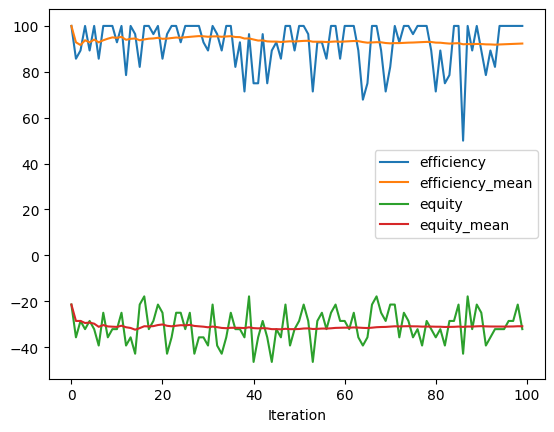

% of students with f=1:  26.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  92.85714285714286
assessing equity: 
% of students from A:  78.57142857142857
% of students from D:  21.428571428571427
% of students with f=1:  30.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  78.57142857142857
% of students from D:  21.428571428571427
% of students with f=1:  33.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  85.71428571428571
% of students from D:  14.285714285714285
% of students with f=1:  34.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  71.42857142857143
% of students from D:  28.57142857142857
% of students with f=1:  30.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  75.0
% of

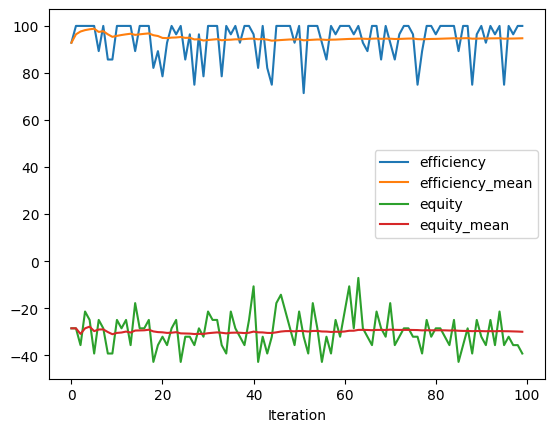

% of students with f=1:  23.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  82.14285714285714
assessing equity: 
% of students from A:  82.14285714285714
% of students from D:  17.857142857142858
% of students with f=1:  33.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  75.0
% of students from D:  25.0
% of students with f=1:  26.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  92.85714285714286
assessing equity: 
% of students from A:  75.0
% of students from D:  25.0
% of students with f=1:  30.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  85.71428571428571
% of students from D:  14.285714285714285
% of students with f=1:  25.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  89.28571428571429
assessing equity: 
% of students from A:  78.57142857142857
% of students from D

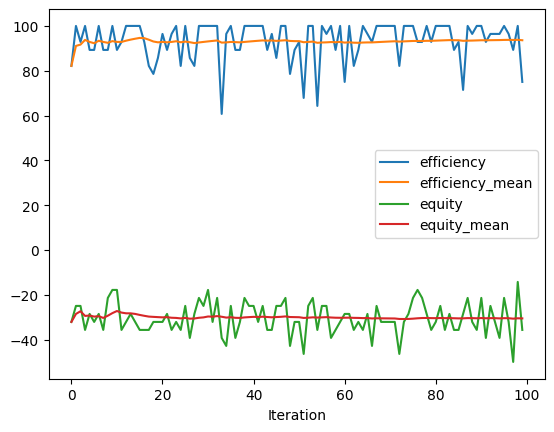

% of students with f=1:  28.000000000000004
assessing efficiency: 
% of admitted students with f=1 (efficiency):  100.0
assessing equity: 
% of students from A:  89.28571428571429
% of students from D:  10.714285714285714
% of students with f=1:  21.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  75.0
assessing equity: 
% of students from A:  82.14285714285714
% of students from D:  17.857142857142858
% of students with f=1:  23.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  82.14285714285714
assessing equity: 
% of students from A:  82.14285714285714
% of students from D:  17.857142857142858
% of students with f=1:  21.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  75.0
assessing equity: 
% of students from A:  82.14285714285714
% of students from D:  17.857142857142858
% of students with f=1:  26.0
assessing efficiency: 
% of admitted students with f=1 (efficiency):  92.85714285714286
assessing equity: 
% of st

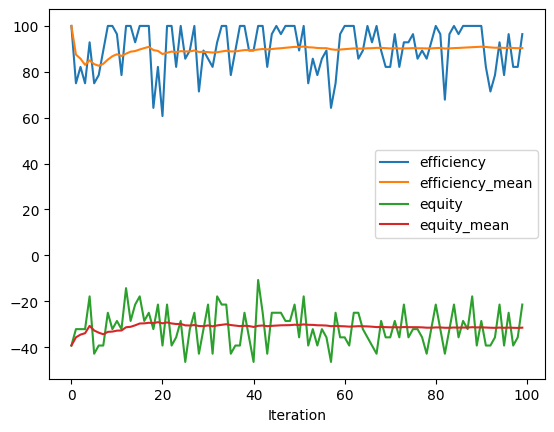

In [7]:
scenarios = ['base','','','']

for scenario in scenarios:
    efficiency = []
    efficiency_mean = []
    equity = []
    equity_mean = []
    gen = range(100)

    for x in gen:
        res = run_admission_iter()
        efficiency.append(res['efficiency'])
        efficiency_mean.append(np.mean(efficiency))
        equity.append(res['equity'])
        equity_mean.append(np.mean(equity))

    plt.plot(gen,efficiency,label="efficiency")
    plt.plot(gen,efficiency_mean,label="efficiency_mean")
    plt.plot(gen,equity,label="equity")
    plt.plot(gen,equity_mean,label="equity_mean")
    plt.xlabel("Iteration")
    plt.legend()
    plt.show()

PART II

Approach:
1. Define how the college admittance status and group membership of each Generation 1 student impacts the group membership of each Generation 2 student.
- Note: Assume asexual reproduction, each Generation 1 student produces 1 Generation 2 student that is influenced by their parent.

2. Define parameters for x_1 and x_2 probabilities for subsequent generations as influenced by group membership that is influenced by the previous generation's group membership and admittance to college.

3. Use the algorithm from Part I to simulate college admissions process for the next generation based on the previous generation's group membership and college admission status.

4. Repeat step 3. for 100-1000 generations.

5. Assess the social mobility (change in proportion of groups A and D over time) in all four scenarios.

6. Perform sensitivity analysis by varying the parameters of the model and then assessing the social mobility?